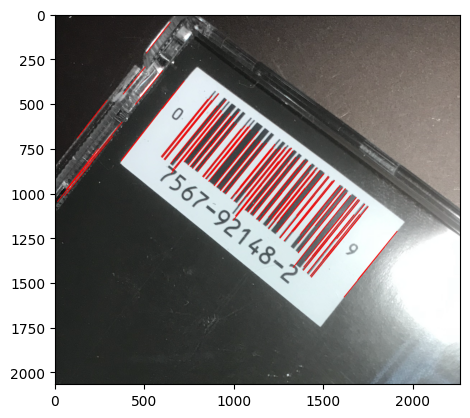

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Read image
img = cv2.imread('barcode03.png', cv2.IMREAD_COLOR)


# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Find the edges in the image using Canny detector
edges = cv2.Canny(gray, 50, 200)


# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=150, maxLineGap=10)


# Draw lines on the image with a slope close to 45 degrees (inclinadas hacia la derecha)
for line in lines:
   x1, y1, x2, y2 = line[0]
   slope = (y2 - y1) / (x2 - x1 + 1e-10)  # Avoid division by zero
  
   # Ajusta este umbral según sea necesario para seleccionar líneas inclinadas hacia la derecha
   if 1.2 <= abs(slope) <= 2:
       cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)


# Show result
plt.imshow(img)
cv2.imwrite('barcode03_lines_right.png', img)
plt.show()

